#Loan prediction using Classification Algorithms 


#Objective
The major aim of this project is to predict which of the customers will have their loan paid or not. 

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm


#Data Import

In [ ]:
#Read CSV data
url = 'https://raw.githubusercontent.com/SiddhantVitragiJain/GitData/main/LoanPrediction.csv'
data = pd.read_csv(url)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Data Description

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

#Univariate Analysis

In [ ]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


#Treating the Null Values

In [ ]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Replace LoanAmount using median 
median = data['LoanAmount'].median()
print(median)
data['LoanAmount'].fillna(median, inplace=True)

128.0


In [ ]:
# Replace Loan_Amount_Term using mode 
mode = data['Loan_Amount_Term'].mode()
print(mode)
data['Loan_Amount_Term'].fillna(mode, inplace=True)

0    360.0
dtype: float64


In [ ]:
# Replace Credit_History using mode
#mode = data['Credit_History'].mode()
#print(mode)
#data['Credit_History'].fillna(mode, inplace=True)
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

#Label encoding

In [ ]:
#Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Married'] = le.fit_transform(data['Married'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Loan_Amount_Term'] = le.fit_transform(data['Loan_Amount_Term'])
data['Credit_History'] = le.fit_transform(data['Credit_History'])
#data.Loan_Amount_Term.unique()

In [ ]:
#Rechecking for Null Values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Identify and Treatment of Outliers using Winsorization technique**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


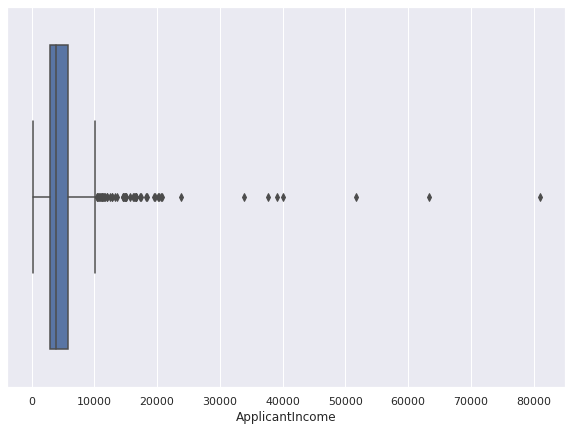

In [ ]:
#Visulisation of outlier for Applicant Income
sns.boxplot(data['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


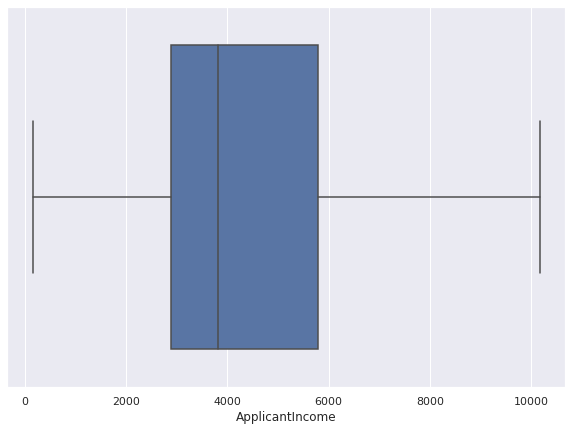

In [ ]:
#Removal of Outliers using Winsorization
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
data['ApplicantIncome']=np.where(data['ApplicantIncome'] > upper_limit,upper_limit,data['ApplicantIncome'])
data['ApplicantIncome']=np.where(data['ApplicantIncome'] < low_limit,low_limit,data['ApplicantIncome'])

#Visulisation of outlier for  Applicant Income
sns.boxplot(data['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


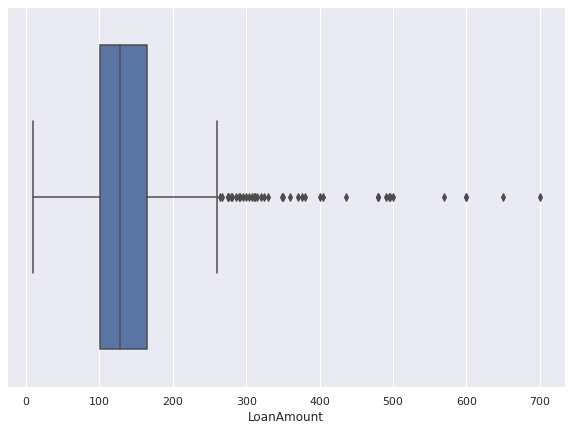

In [ ]:
#Visulisation of outlier for  LoanAmount
sns.boxplot(data['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


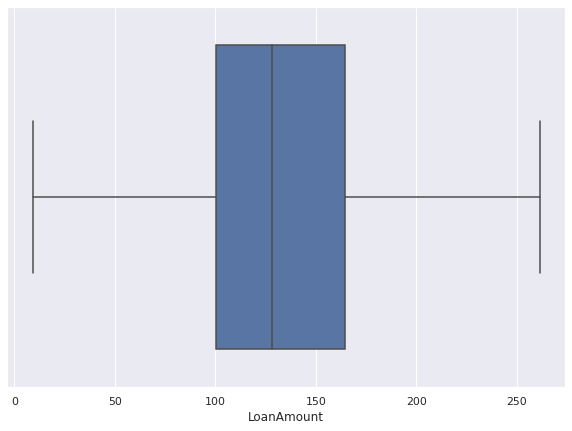

In [ ]:
#Removal of Outliers using Winsorization
q1 = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
data['LoanAmount']=np.where(data['LoanAmount'] > upper_limit,upper_limit,data['LoanAmount'])
data['LoanAmount']=np.where(data['LoanAmount'] < low_limit,low_limit,data['LoanAmount'])

#Visulisation of outlier for  LoanAmount
sns.boxplot(data['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


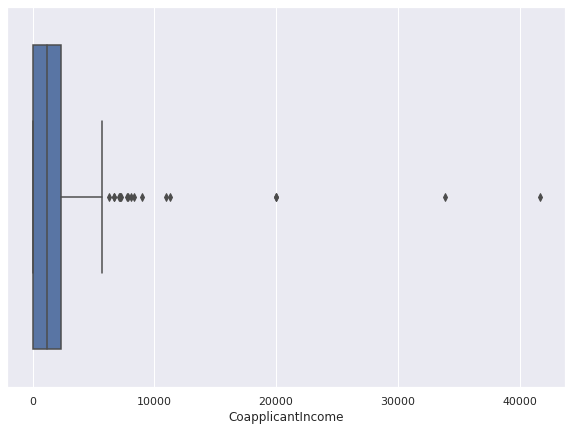

In [ ]:
#Visulisation of outlier for  CoapplicantIncome
sns.boxplot(data['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


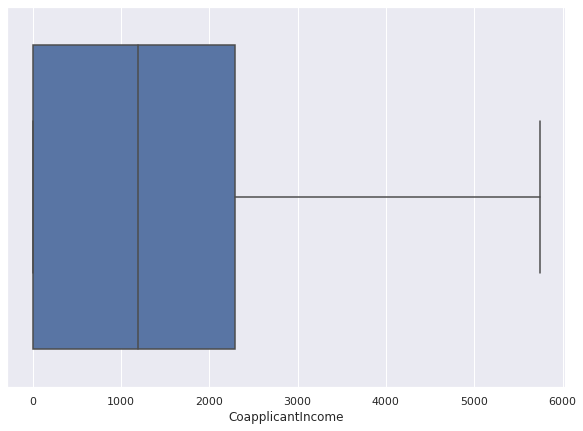

In [ ]:
#Removal of Outliers using Winsorization
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
data['CoapplicantIncome']=np.where(data['CoapplicantIncome'] > upper_limit,upper_limit,data['CoapplicantIncome'])
data['CoapplicantIncome']=np.where(data['CoapplicantIncome'] < low_limit,low_limit,data['CoapplicantIncome'])

#Visulisation of outlier for  CoapplicantIncome
sns.boxplot(data['CoapplicantIncome'])

In [ ]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 62.5+ KB


#Bivariate Analysis

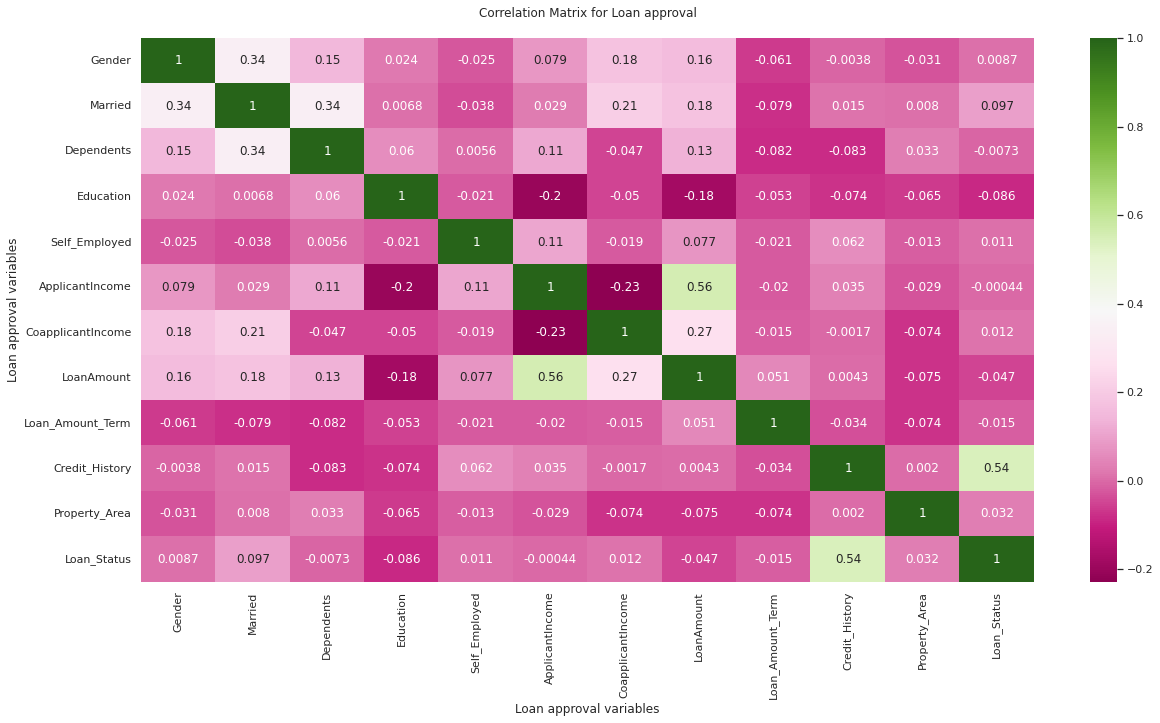

In [ ]:
## Correlation coeffecients heatmap
plt.figure(figsize=(20, 10))
hm = sns.heatmap(data.corr(), annot = True, cmap='PiYG')

hm.set(xlabel='Loan approval variables', ylabel='Loan approval variables',
       title = "Correlation Matrix for Loan approval\n")

plt.show()

<Figure size 1440x360 with 0 Axes>

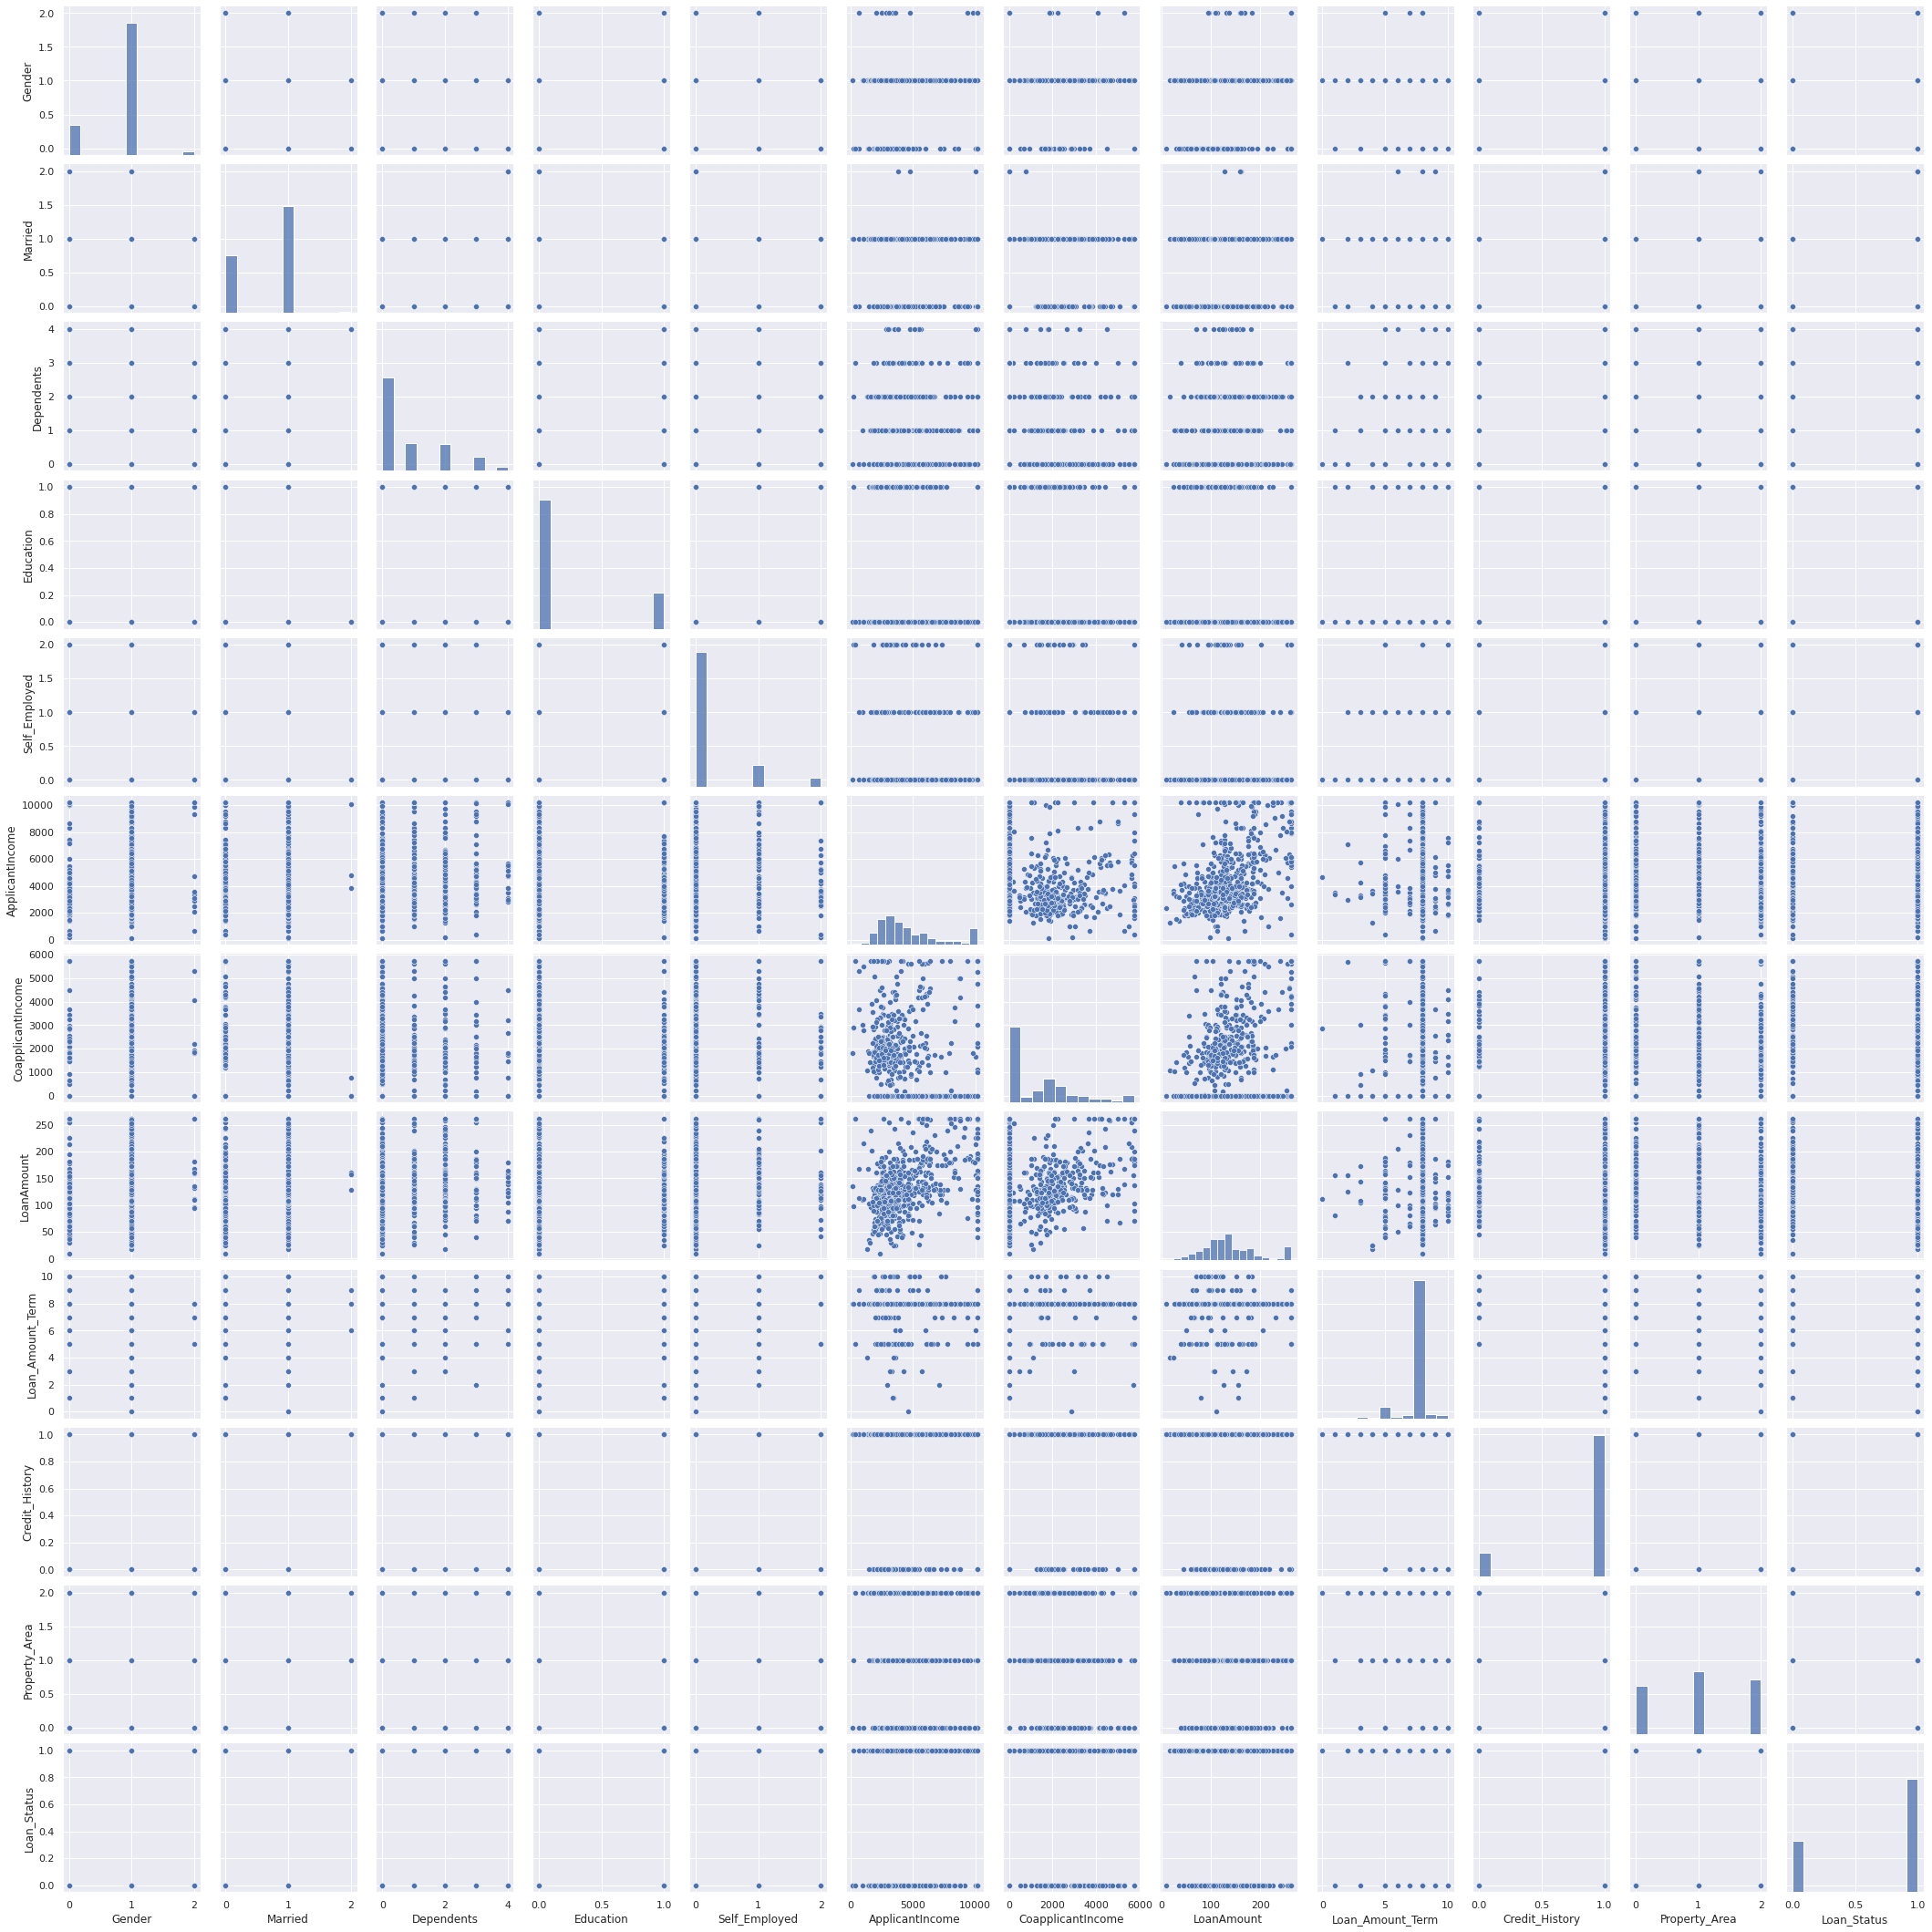

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.pairplot(data)

#Dropping the irrelevant variables - Loan_ID

In [ ]:
df = data.copy()
# Dropping LoanID
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,8,1,2,1


#Univariate Analysis after pre-processing of the data

In [ ]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.838762,0.657980,0.842020,0.218241,0.237785,4617.111564,1419.702231,137.365635,7.713355,0.855049,1.037459,0.687296
std,NaN,0.421752,0.484971,1.120531,0.413389,0.534737,2479.851729,1624.605892,55.779749,1.161895,0.352339,0.787482,0.463973
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,0.000000
50%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,1.000000,1.000000
75%,NaN,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000,1.000000


In [ ]:
# Isolating ApplicantIncome Score data
ApplicantIncome = pd.DataFrame(data['ApplicantIncome'])
ApplicantIncome.describe()

,ApplicantIncome
count,614.000000
mean,4617.111564
std,2479.851729
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,10171.250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


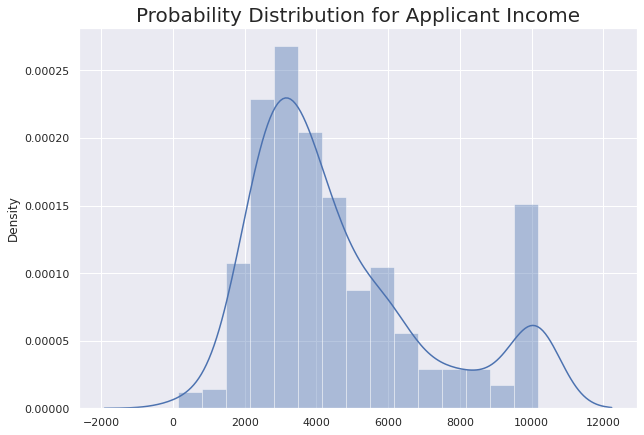

In [ ]:
# # Probability Distribution
sns.distplot(ApplicantIncome).set_title('Probability Distribution for Applicant Income', size='20')
plt.show()

In [ ]:
# Isolating ApplicantIncome Score data
CoapplicantIncome = pd.DataFrame(data['CoapplicantIncome'])
CoapplicantIncome.describe()

,CoapplicantIncome
count,614.000000
mean,1419.702231
std,1624.605892
min,0.000000
25%,0.000000
50%,1188.500000
75%,2297.250000
max,5743.125000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


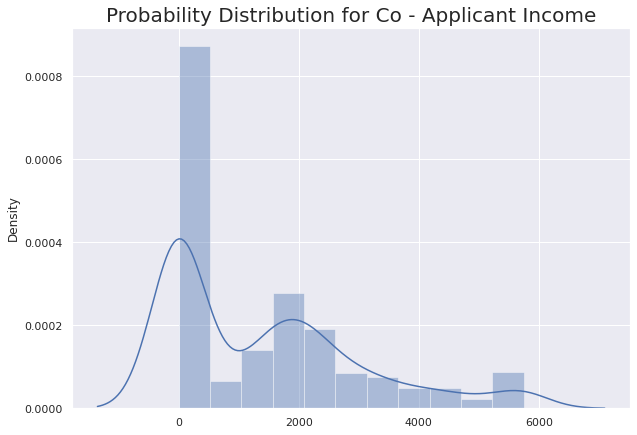

In [ ]:
# # Probability Distribution
sns.distplot(CoapplicantIncome).set_title('Probability Distribution for Co - Applicant Income', size='20')
plt.show()

In [ ]:
# Isolating Credit_History Score data
LoanAmount = pd.DataFrame(data['LoanAmount'])
LoanAmount.describe()

,LoanAmount
count,614.000000
mean,137.365635
std,55.779749
min,9.000000
25%,100.250000
50%,128.000000
75%,164.750000
max,261.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


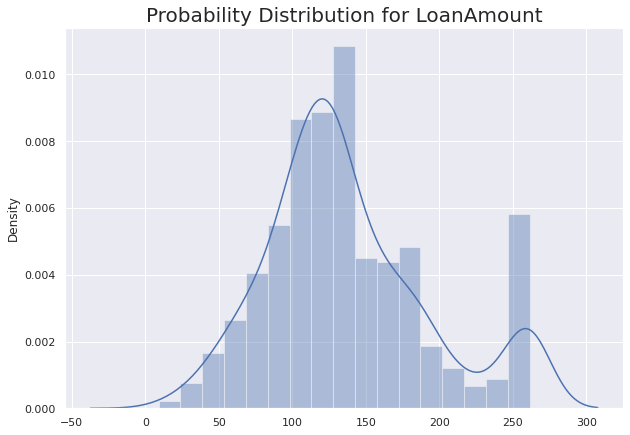

In [ ]:
# # Probability Distribution
sns.distplot(LoanAmount).set_title('Probability Distribution for LoanAmount', size='20')
plt.show()

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Checking for Multicollinearity using VIF Plot

In [ ]:
#Dropping the dependent variable
X=df.drop(['Loan_Status'],axis=1)
Y=df.Loan_Status

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)
#['Gender', 'Married', 'Dependents', 'Education', 'Credit_History'],

,Variables,VIF
0,Gender,5.573621
1,Married,3.707970
2,Dependents,1.853090
3,Education,1.328511
4,Self_Employed,1.220631
5,ApplicantIncome,8.472818
6,CoapplicantIncome,2.581669
7,LoanAmount,13.854826
8,Loan_Amount_Term,13.326778
9,Credit_History,6.298295


#Variable Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression 
# calling the logistic regression model 
llog = LogisticRegression()
sfs1 = sfs(llog,direction='forward')


In [ ]:
sfs1 = sfs1.fit(X, Y)
sfs1.get_feature_names_out()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array(['Gender', 'Married', 'Dependents', 'Education', 'Credit_History'],
      dtype=object)

#Train Test Split


In [ ]:
X=df.drop(['Loan_Status'],axis=1)
Y=df.Loan_Status

In [ ]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,8,1,2
1,1,1,1,0,0,4583.0,1508.0,128.0,8,1,0
2,1,1,0,0,1,3000.0,0.0,66.0,8,1,2
3,1,1,0,1,0,2583.0,2358.0,120.0,8,1,2
4,1,0,0,0,0,6000.0,0.0,141.0,8,1,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (429, 11) (429,)
Test set: (185, 11) (185,)


#Normalization

In [ ]:
# normalization
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scalerX = MinMaxScaler(feature_range=(0, 1))
scalerX = StandardScaler()
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

#Model Building

1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predlogr = logr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test))

Accuracy Score: 0.7837837837837838


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predlogr))
cm_lrc = confusion_matrix(y_test,y_predlogr)

[[ 26  38]
 [  2 119]]


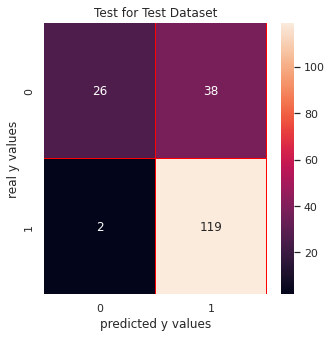

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_predlogr))
print("recall_score: ", recall_score(y_test, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_predlogr))

precision_score:  0.7579617834394905
recall_score:  0.9834710743801653
f1_score:  0.8561151079136692


Test for Train Dataset:

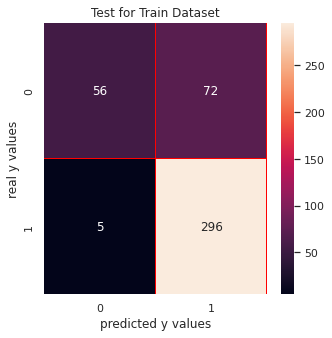

In [ ]:
cm_lrc_train = confusion_matrix(y_train,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train,logr.predict(X_train)))

Accuracy Score: 0.8205128205128205


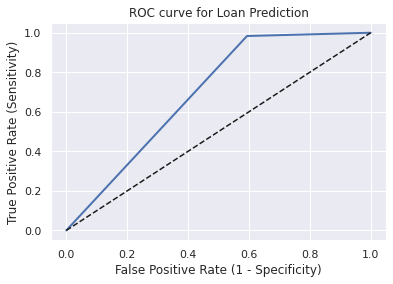

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predlogr, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Loan Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

#Calculating ROC,AUC Scores for Logistic Regression

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.731


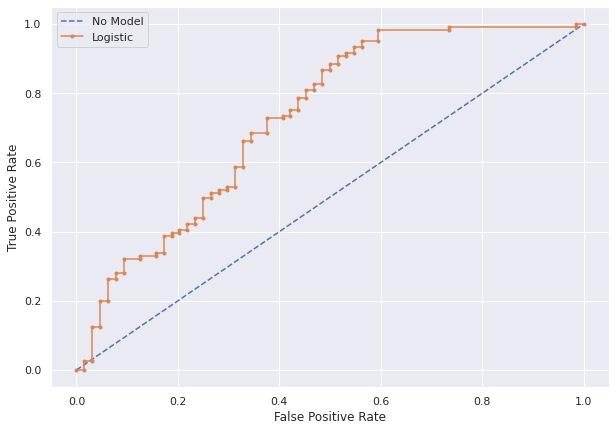

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Model')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

2.Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test))

score:  0.7837837837837838


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[ 26,  38],
       [  2, 119]])

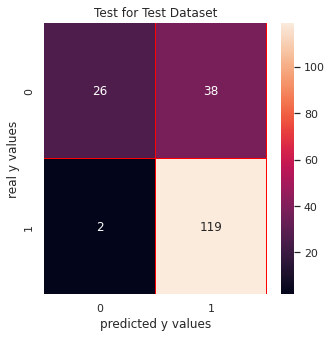

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_svm))
print("recall_score: ", recall_score(y_test,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_svm))

precision_score:  0.7579617834394905
recall_score:  0.9834710743801653
f1_score:  0.8561151079136692


Test for Train Dataset:

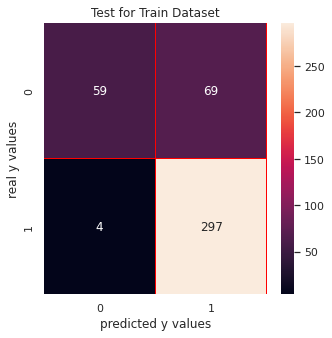

In [ ]:
cm_svm_train = confusion_matrix(y_train, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train, svm.predict(X_train)))

Accuracy Score: 0.8298368298368298


#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print("score: ", nb.score(X_test,y_test))

score:  0.7783783783783784


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_nb

array([[ 26,  38],
       [  3, 118]])

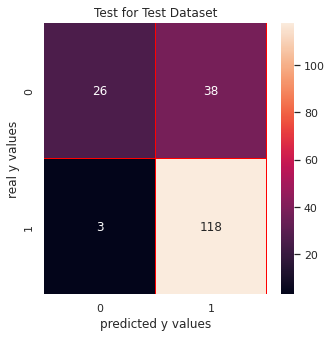

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_nb))
print("recall_score: ", recall_score(y_test,y_pred_nb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_nb))

precision_score:  0.7564102564102564
recall_score:  0.9752066115702479
f1_score:  0.851985559566787


Test for Train Dataset:

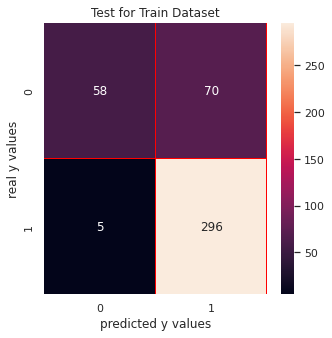

In [ ]:
cm_nb_train = confusion_matrix(y_train,nb.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train,nb.predict(X_train)))

Accuracy Score: 0.8251748251748252


#Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test))

score:  0.7351351351351352


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[ 32,  32],
       [ 17, 104]])

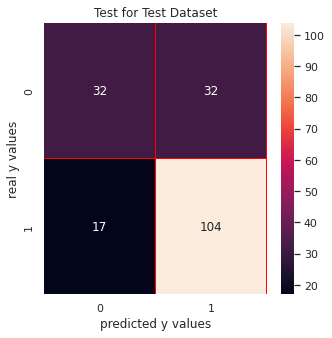

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_dtc))
print("recall_score: ", recall_score(y_test, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_dtc))

precision_score:  0.7647058823529411
recall_score:  0.859504132231405
f1_score:  0.8093385214007782


Test for Train Dataset

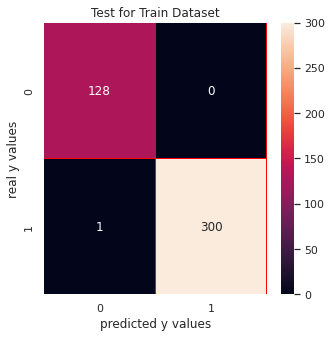

In [ ]:
cm_dtc_train = confusion_matrix(y_train,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train,dtc.predict(X_train)))

Accuracy Score: 0.9976689976689976


#Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test))

score:  0.7783783783783784


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[ 28,  36],
       [  5, 116]])

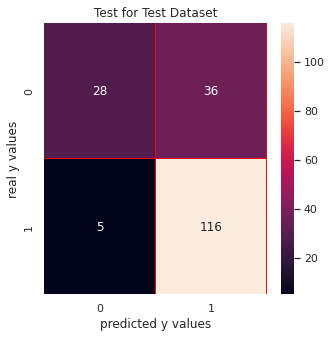

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_rfc))
print("recall_score: ", recall_score(y_test, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_rfc))

precision_score:  0.7631578947368421
recall_score:  0.9586776859504132
f1_score:  0.8498168498168499


Test for train dataset

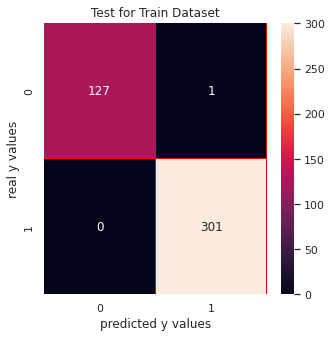

In [ ]:
cm_rfc_train = confusion_matrix(y_train, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train, rfc.predict(X_train)))

Accuracy Score: 0.9976689976689976


#K Nearest Neighbors Classification

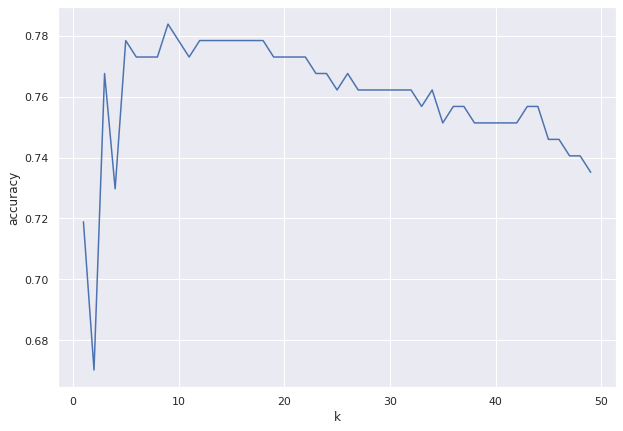

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train)
    scores.append(knn_n.score(X_test, y_test))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

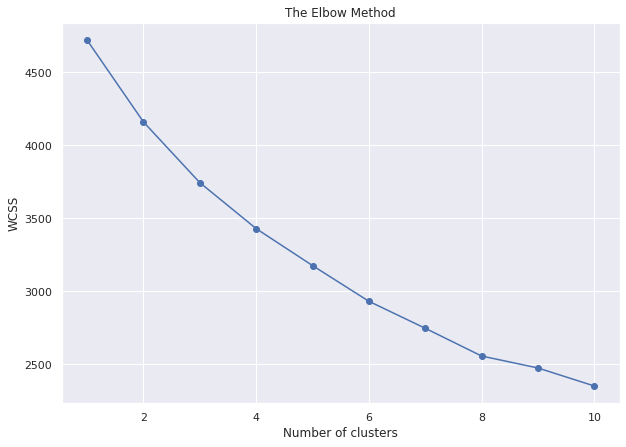

In [ ]:
from sklearn.cluster import KMeans
sns.set_theme()
wcss = []
for i in range(1, 11):
    knn_n = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    knn_n.fit(X_train, y_train)
    wcss.append(knn_n.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7) # n_neighbors = k
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("score of 7 :",knn.score(X_test,y_test))

score of 7 : 0.772972972972973


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_knn

array([[ 26,  38],
       [  4, 117]])

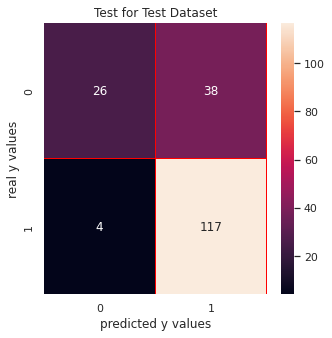

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_knn))
print("recall_score: ", recall_score(y_test, y_pred_knn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_knn))

precision_score:  0.7548387096774194
recall_score:  0.9669421487603306
f1_score:  0.8478260869565216


Test for Train Dataset

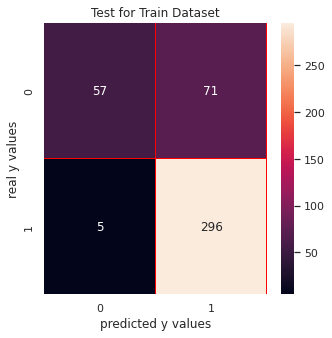

In [ ]:
cm_knn_train = confusion_matrix(y_train,knn.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train,knn.predict(X_train)))

Accuracy Score: 0.8228438228438228


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.01)
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
print("score: ", gbc.score(X_test, y_test))

score:  0.7783783783783784


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_gbc

array([[ 25,  39],
       [  2, 119]])

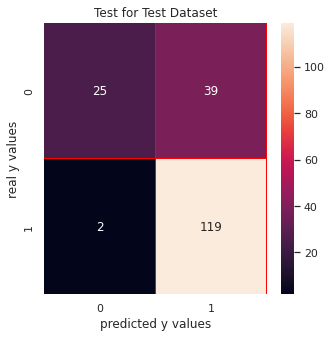

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_gbc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_gbc))
print("recall_score: ", recall_score(y_test, y_pred_gbc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_gbc))

precision_score:  0.7531645569620253
recall_score:  0.9834710743801653
f1_score:  0.8530465949820789


Test for Train Dataset

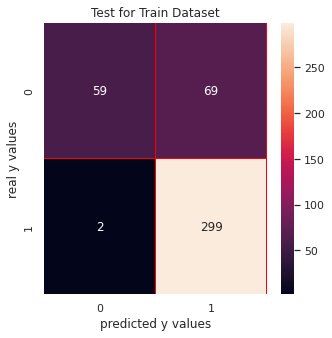

In [ ]:
cm_gbc_train = confusion_matrix(y_train, gbc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_gbc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train, gbc.predict(X_train)))

Accuracy Score: 0.8344988344988346


#AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
print("score: ", abc.score(X_test, y_test))

score:  0.7351351351351352


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_abc = confusion_matrix(y_test, y_pred_abc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_abc

array([[ 29,  35],
       [ 14, 107]])

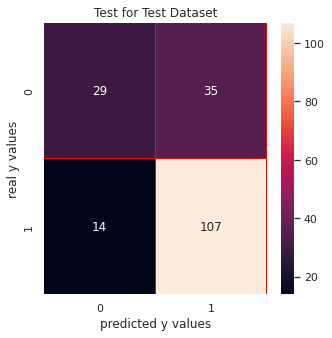

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_abc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_abc))
print("recall_score: ", recall_score(y_test, y_pred_abc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_abc))

precision_score:  0.7535211267605634
recall_score:  0.8842975206611571
f1_score:  0.8136882129277567


Test for Train Dataset

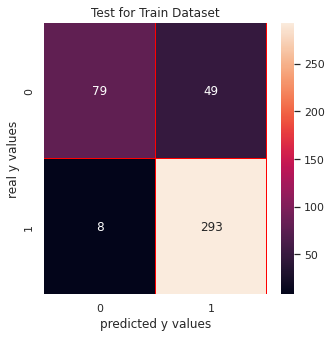

In [ ]:
cm_abc_train = confusion_matrix(y_train, abc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_abc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
print("Accuracy Score:", accuracy_score(y_train, abc.predict(X_train)))

Accuracy Score: 0.8671328671328671


#Comparison of Classification Algorithms

In [ ]:
plt.rcParams['figure.figsize']=10,7
sns.set_style("darkgrid")
ax = sns.barplot(x, y, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

NameError: ignored